In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

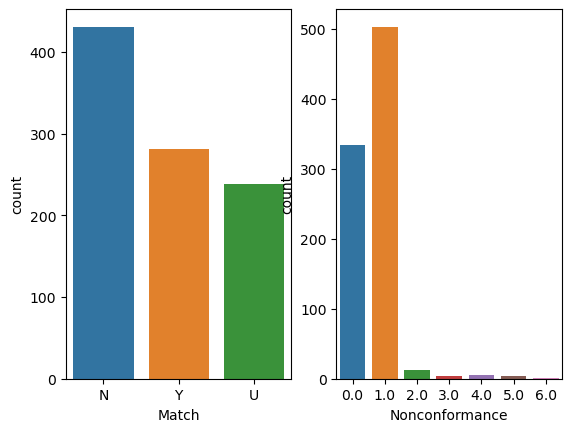

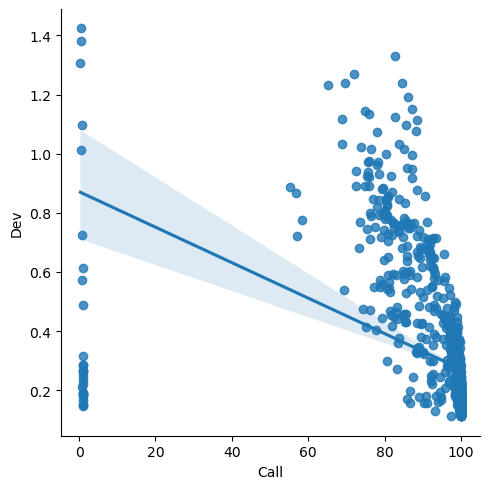

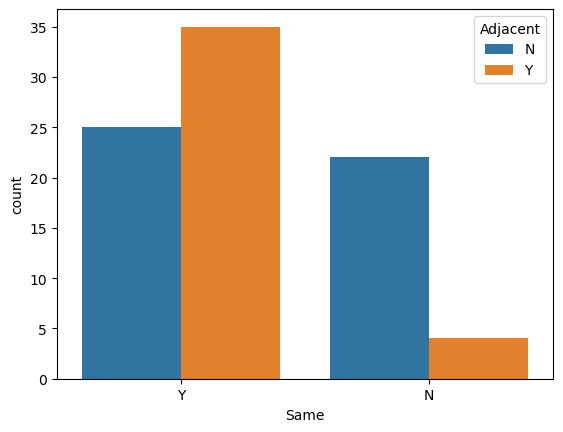

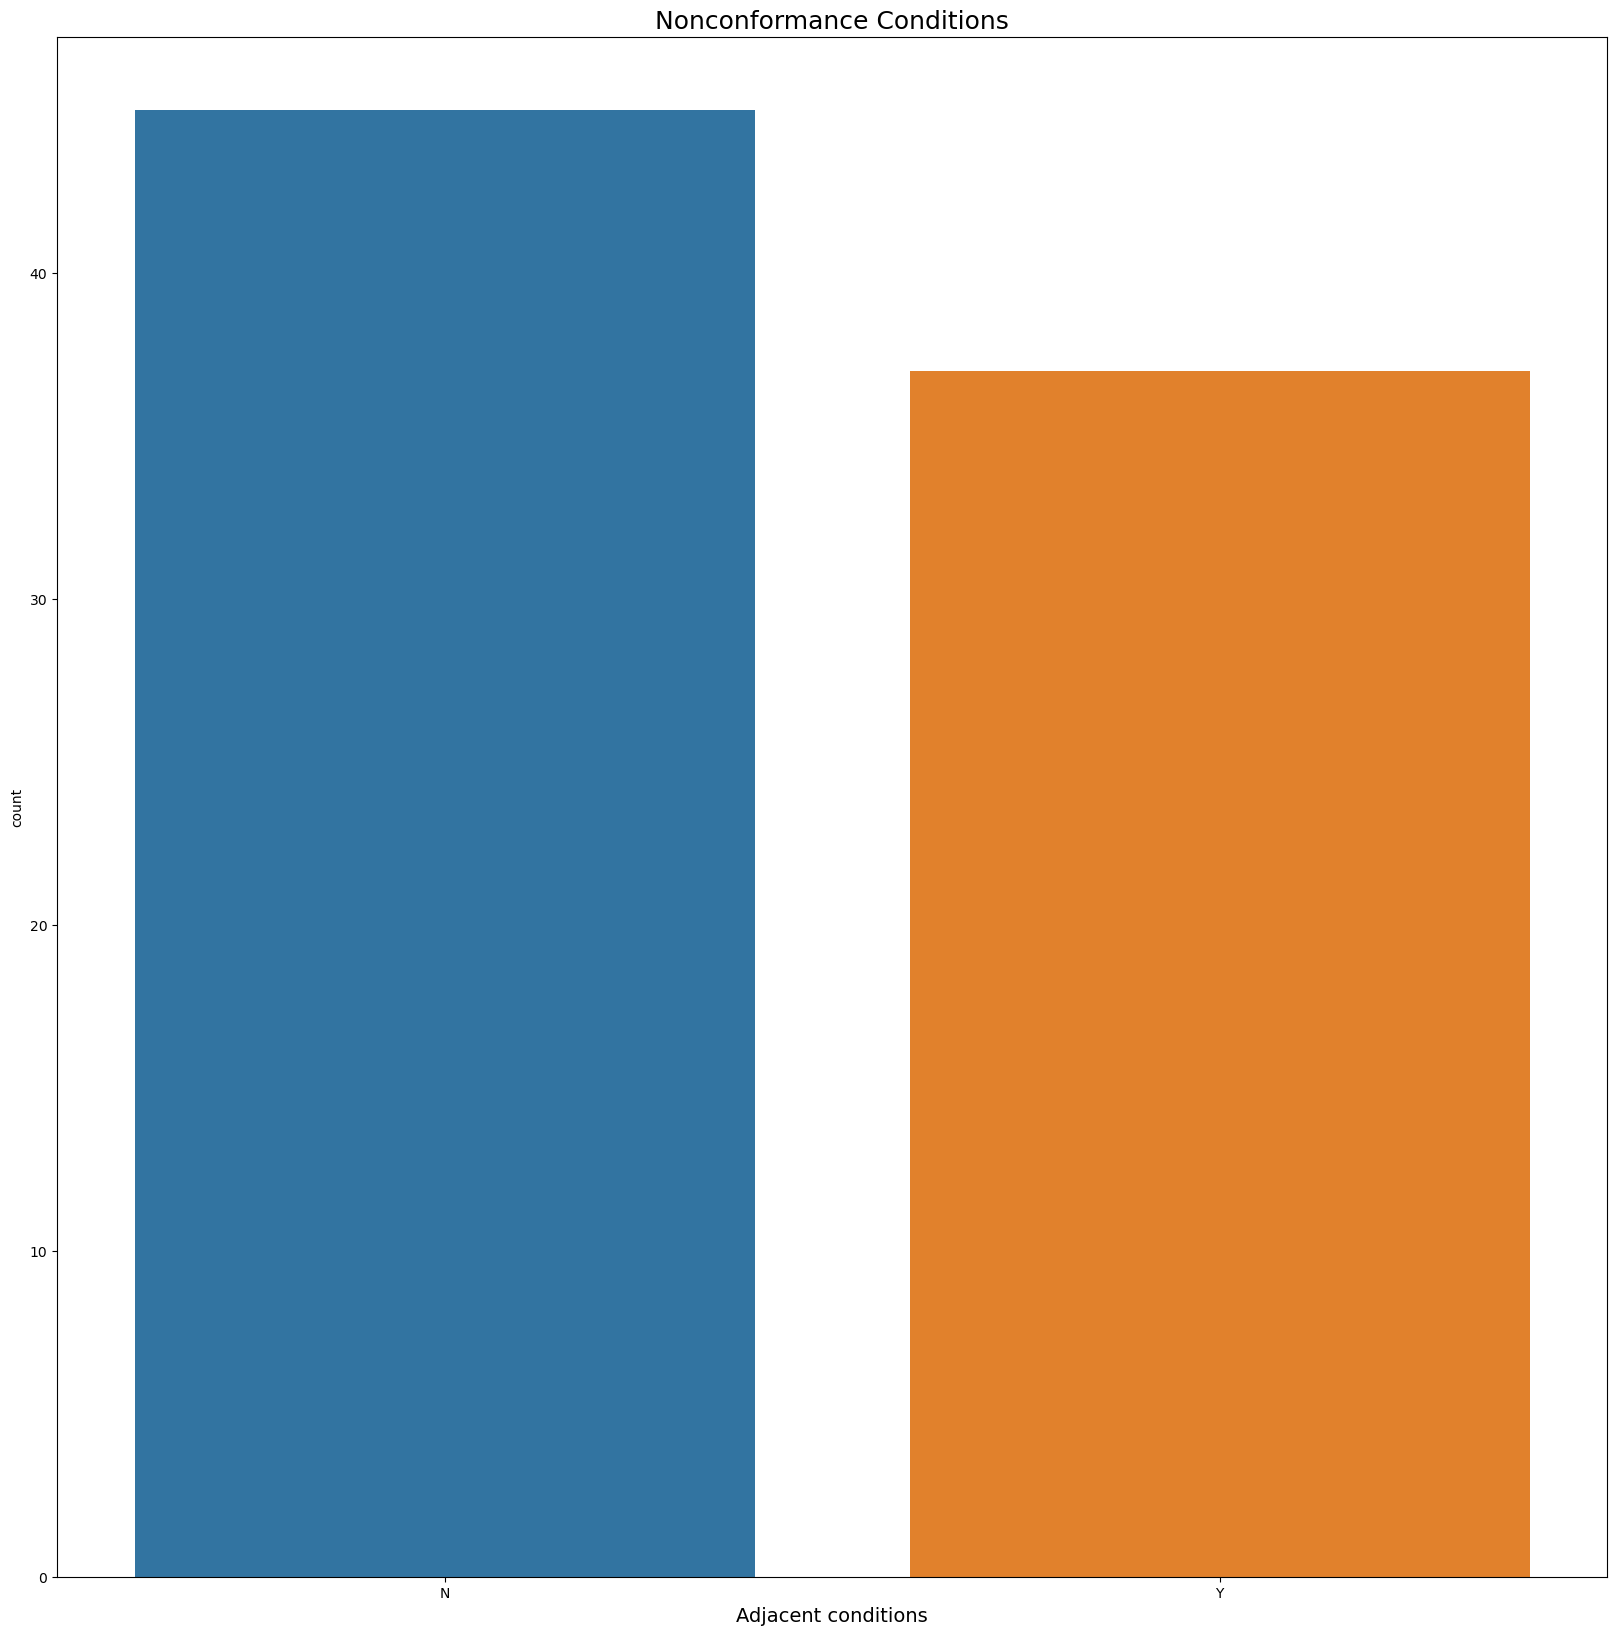

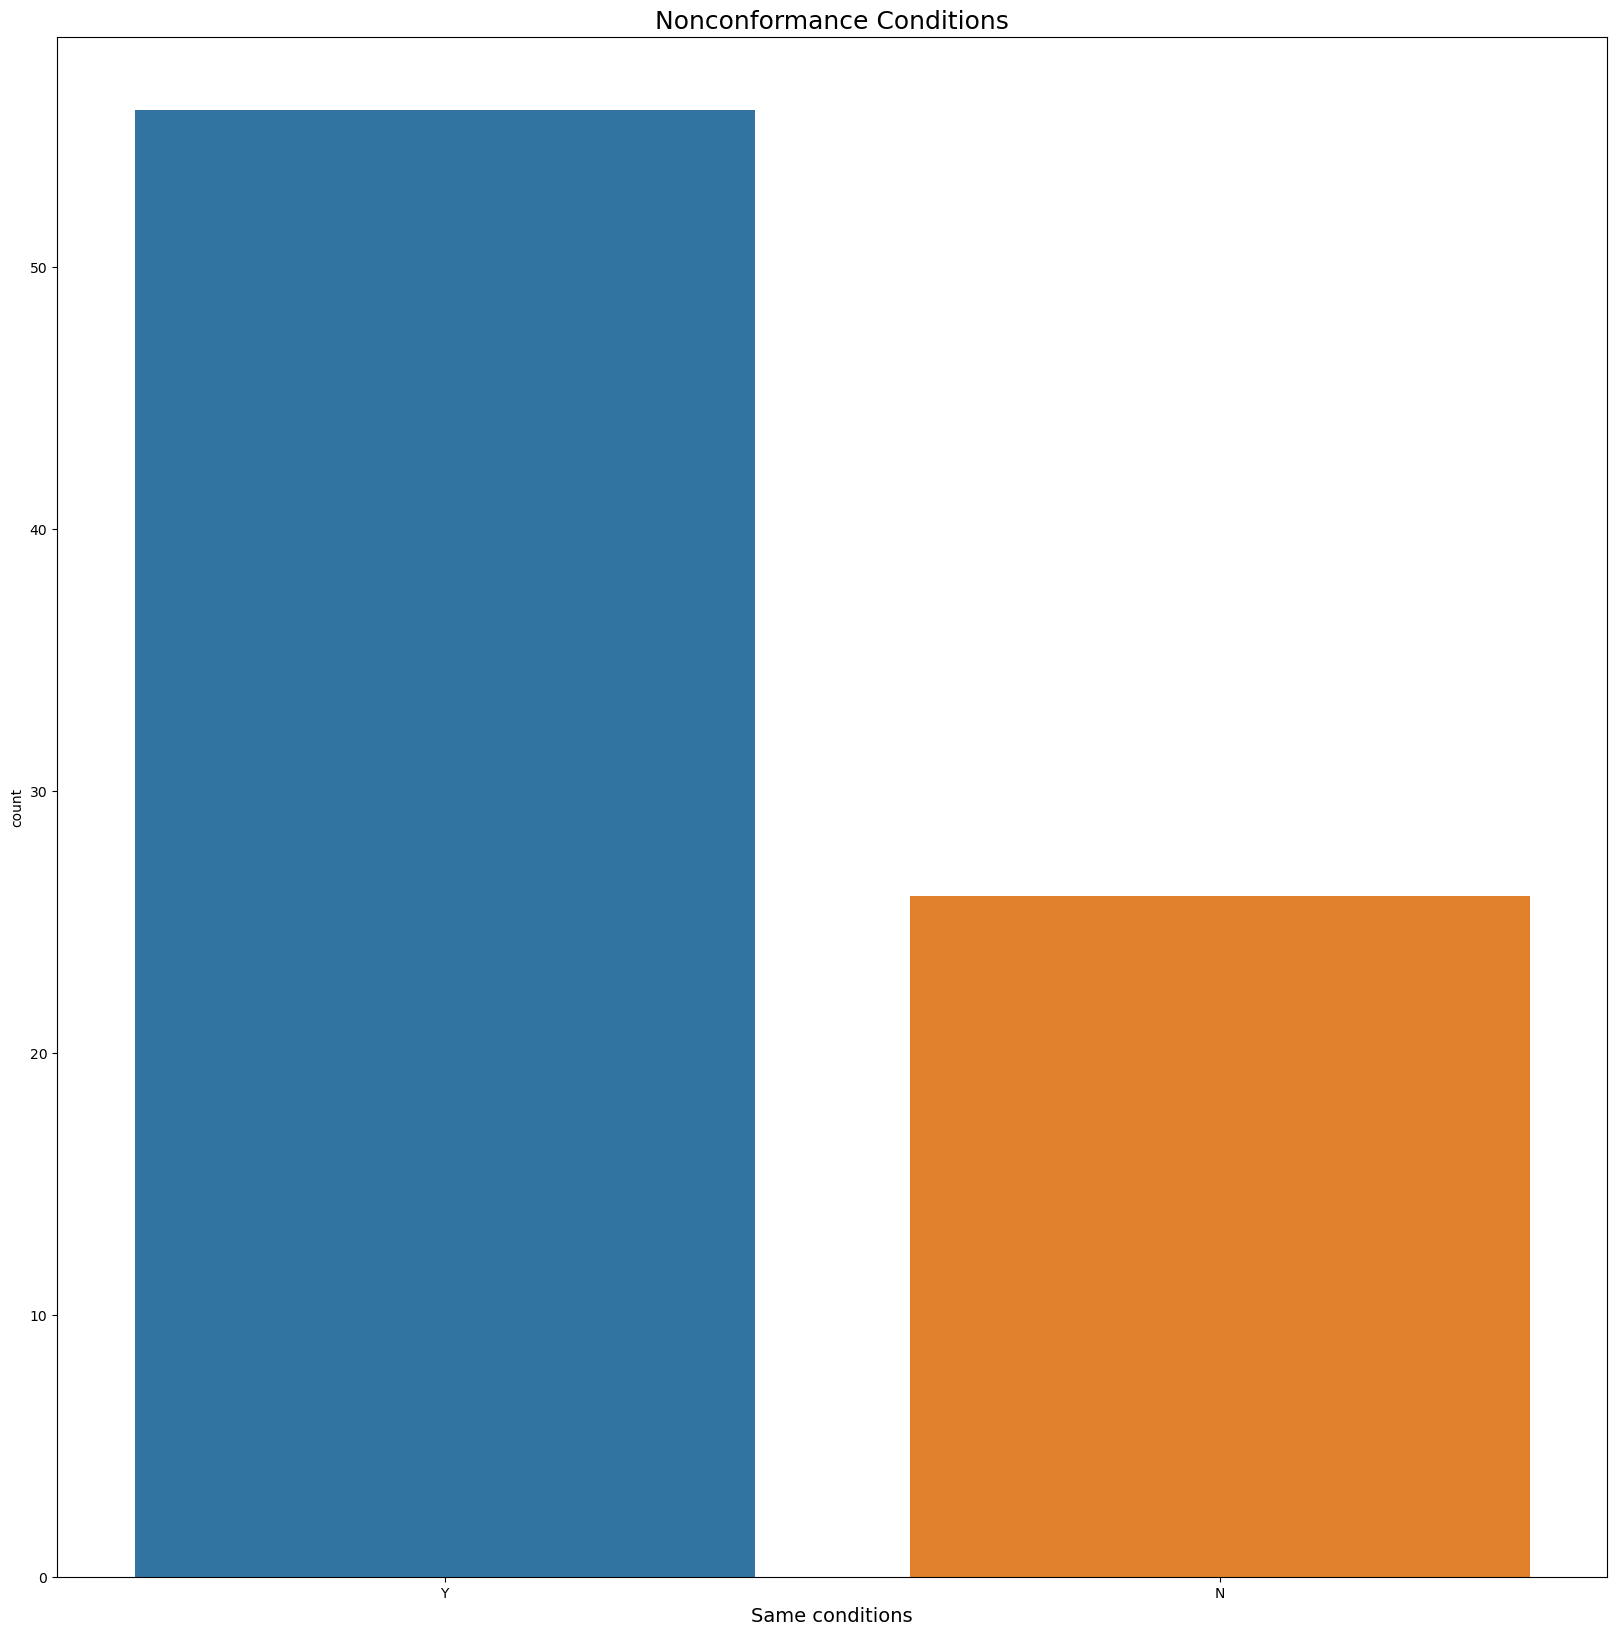

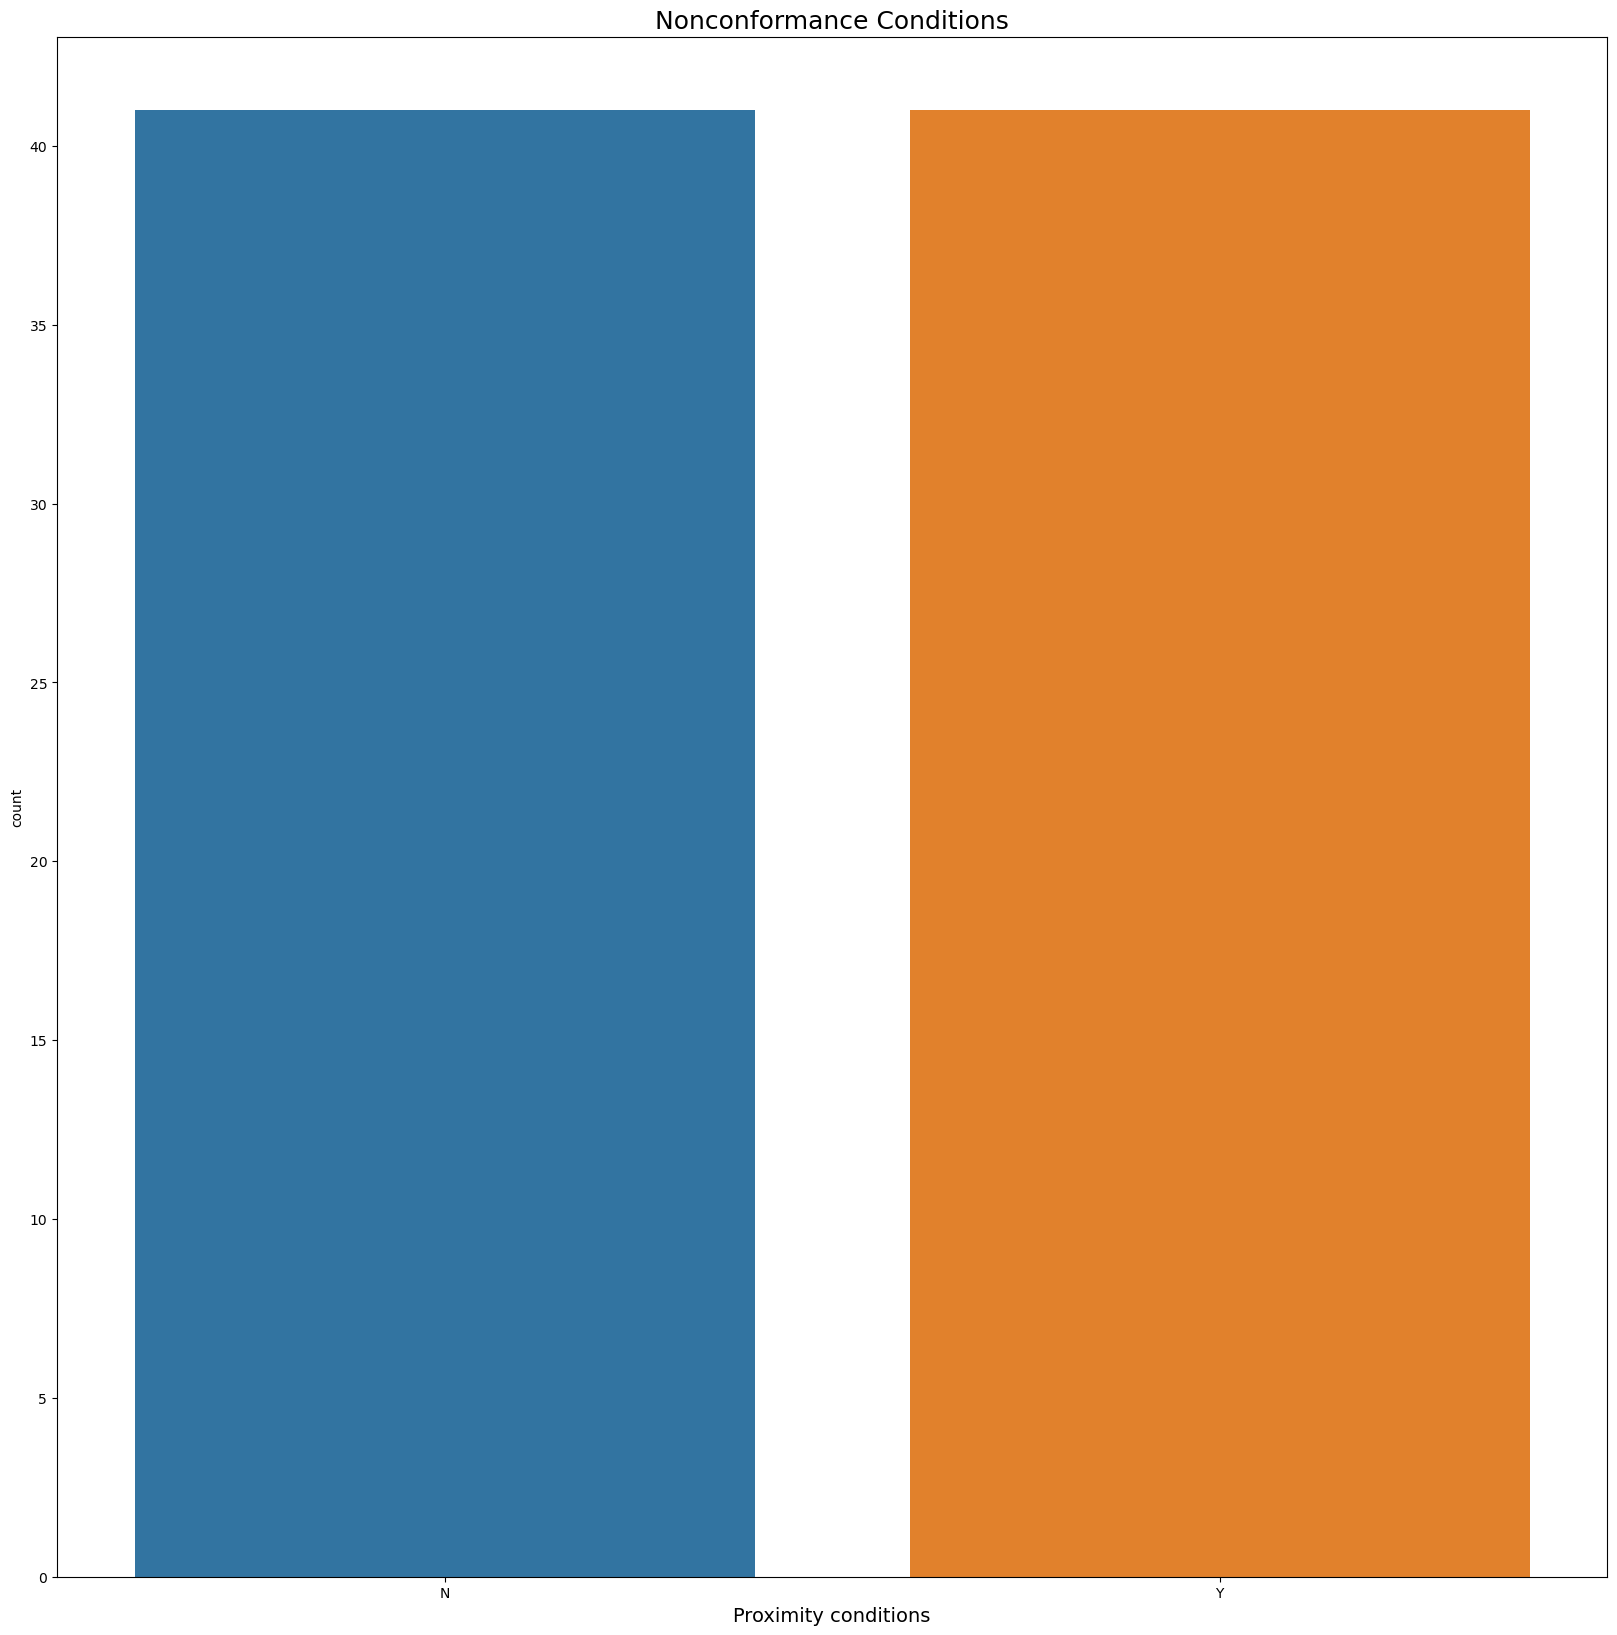

In [9]:
data = pd.read_excel("C:/USers/Derelle/Downloads/MapData.xlsx")


data["Row"] = data["Section"].str[1:3]
data["Col"] = data["Section"].str[4:]
data["MSA_loc"] = data["DNA"].str[14:]


#Heatmap of cleaned data
dc = data.corr()
sns.heatmap(dc, cmap = "coolwarm", annot = True)
plt.show()

sns.countplot(data["Match"], ax = plt.subplot(121))
sns.countplot(data["Nonconformance"], ax = plt.subplot(122))


#Initializing Post Data figures
fig = plt.figure(figsize = (20,20))
plt.suptitle("Lab 2 Machine Usage", fontsize = 16)

sns.countplot(data["Process1Machine"], ax=plt.subplot(141))
x_label = plt.xlabel("Machine 1")
title = plt.title("Process 1")
plt.xticks(rotation=90)

sns.countplot(data["Process2Machine"], ax=plt.subplot(142))
x_label = plt.xlabel("Machine 1")
title = plt.title("Process 2")
plt.xticks(rotation=90)

sns.countplot(data["Process1Machine"], hue = data["Match"], ax=plt.subplot(143))
x_label = plt.xlabel("Machine 1")
title = plt.title("Gender Matches per Machine (Process 1)")
plt.xticks(rotation=90)

sns.countplot(data["Process2Machine"], hue = data["Match"], ax=plt.subplot(144))
x_label = plt.xlabel("Machine 1")
title = plt.title("Gender Matches per Machine (Process 2)")
plt.xticks(rotation=90)

plt.show()

#counting
tecans = data["Process2Machine"].tolist()
counts = data.groupby(["Process2Machine","Nonconformance"]).count()
totals = counts.sum(level=0)
counts = counts.unstack(level=1)
counts.solumns = counts.columns = counts.columns.droplevel(level=0)


sns.lmplot(x="Call", y="Dev", data = data)
plt.show()

sns.countplot(data["Same"], hue = data["Adjacent"])
plt.show()


nonProxMatches = data[(data["Same"] == "Y") & (data["Proximity"] == "N")]
proxMatches = data[data["Proximity"] == "Y"]
adjMatches = data[data["Adjacent"] == "Y"]

wellMatches = ["Adjacent", "Same", "Proximity"]

for condition in wellMatches:
    fig = plt.figure(figsize=(20,20))

    sns.countplot(data.loc[data['Nonconformance'] > 0, condition])

    x_label = plt.xlabel(condition + " conditions", fontsize = 14)
    title = plt.title("Nonconformance Conditions", fontsize = 18)

    plt.show()